In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.io import fits 

In [24]:
import glob
files = glob.glob('../data/hip67522/CHEOPS-products-*/Outdata/00000/hip67522_CHEOPS-products-*_im.fits')
files

['../data/hip67522/CHEOPS-products-20240319122713/Outdata/00000/hip67522_CHEOPS-products-20240319122713_im.fits',
 '../data/hip67522/CHEOPS-products-20240603073928/Outdata/00000/hip67522_CHEOPS-products-20240603073928_im.fits',
 '../data/hip67522/CHEOPS-products-visit_701/Outdata/00000/hip67522_CHEOPS-products-visit_701_im.fits',
 '../data/hip67522/CHEOPS-products-20240522113135/Outdata/00000/hip67522_CHEOPS-products-20240522113135_im.fits',
 '../data/hip67522/CHEOPS-products-20240412070023/Outdata/00000/hip67522_CHEOPS-products-20240412070023_im.fits',
 '../data/hip67522/CHEOPS-products-20240311145359/Outdata/00000/hip67522_CHEOPS-products-20240311145359_im.fits',
 '../data/hip67522/CHEOPS-products-visit_1001/Outdata/00000/hip67522_CHEOPS-products-visit_1001_im.fits',
 '../data/hip67522/CHEOPS-products-20240312075007/Outdata/00000/hip67522_CHEOPS-products-20240312075007_im.fits',
 '../data/hip67522/CHEOPS-products-20240529072301/Outdata/00000/hip67522_CHEOPS-products-20240529072301_im

In [25]:
cheops_phases = np.array([])
midpoint = 2460392.61598
period = 6.959503
# period = 1.44
offs =0
plt.figure(figsize=(6,14))

time = np.array([])
flux = np.array([])

for file in files:
    hdulist = fits.open(file)


    # get the image data
    image_data = hdulist[1].data

    t, f, ferr, roll, flag = image_data["MJD_TIME"], image_data["FLUX"], image_data["FLUXERR"], image_data["ROLL"], image_data["FLAG"]

    # make sure the data is in fact 10s cadence
    assert np.diff(t).min() * 24 * 60 * 60 < 10.05, "Time series is not 10s cadence"

    # big endian to little endian
    t = t.byteswap().newbyteorder()
    f = f.byteswap().newbyteorder()
    ferr = ferr.byteswap().newbyteorder()
    roll = roll.byteswap().newbyteorder()
    flag = flag.byteswap().newbyteorder()

    time = np.concatenate([time, t[flag==0]])
    flux = np.concatenate([flux, f[flag==0]])


    # convert t to phase
    phase = ((t - midpoint) % period) / period


    cheops_phases = np.concatenate([cheops_phases, phase])

# mask outliers 
mask = np.abs(flux - np.median(flux)) < 8 * np.std(flux)
time = time[mask]
flux = flux[mask]

#argsort time
idx = np.argsort(time)
time = time[idx]
flux = flux[idx]

<Figure size 600x1400 with 0 Axes>

In [14]:
atca = pd.read_csv("../data/atca_schedule.csv")
atca

,Run date,weekday,start time [CEST],end time [CEST],duration [hh:mm],observer,array configuration,setup help?,Unnamed: 8,total_hours,...,StokesV_mJy_b,sig_StokesV_mJy_b,V_I,Unnamed: 17,start_UTC,end_UTC,start_deltad,end_deltad,start_MJD,end_MJD
0,07/04/2024,Sun,2024-04-07 10:30:00,2024-04-07 22:30:00,12:00:00,Ekaterina,6A,Sanne,NaN,12.0,...,0.000000,0.000017,0.000000,!CA03,2024-04-07 08:30:00,2024-04-07 20:30:00,1.319444,1.819444,60407.354167,60407.854167
1,21/04/2024,Sun,2024-04-21 10:00:00,2024-04-21 19:00:00,09:00:00,Ekaterina,6A,Joe on call,cut short by 3h by triggered observations,9.0,...,0.000000,0.000015,0.000000,!CA03 uvrange>500,2024-04-21 08:00:00,2024-04-21 17:00:00,15.298611,15.673611,60421.333333,60421.708333
2,26/04/2024,Fri,2024-04-26 10:00:00,2024-04-26 22:00:00,12:00:00,Ekaterina,6A,Sanne,NaN,12.0,...,-0.000074,0.000013,0.311345,!CA03 uvrange>500,2024-04-26 08:00:00,2024-04-26 20:00:00,20.298611,20.798611,60426.333333,60426.833333
3,28/04/2024,Sun,2024-04-28 14:30:00,2024-04-28 20:30:00,06:00:00,Ekaterina,6A,called Sanne for help,NaN,6.0,...,0.000000,0.000017,0.000000,!CA03 uvrange>500,2024-04-28 12:30:00,2024-04-28 18:30:00,22.486111,22.736111,60428.520833,60428.770833
4,05/05/2024,Sun,2024-05-05 14:30:00,2024-05-05 21:00:00,06:30:00,Ekaterina,6A,called Joe for help,NaN,6.5,...,0.000000,0.000017,0.000000,NaN,2024-05-05 12:30:00,2024-05-05 19:00:00,29.486111,29.756944,60435.520833,60435.791667
5,11/05/2024,Sat,2024-05-11 08:30:00,2024-05-11 20:30:00,12:00:00,Ekaterina,6A,NaN,NaN,12.0,...,0.000000,0.000012,0.000000,!CA03,2024-05-11 06:30:00,2024-05-11 18:30:00,35.236111,35.736111,60441.270833,60441.770833
6,15/05/2024,Wed,2024-05-15 08:00:00,2024-05-15 20:00:00,12:00:00,Ekaterina,6A,called Joe for help?,NaN,12.0,...,0.000000,0.000011,0.000000,!CA03,2024-05-15 06:00:00,2024-05-15 18:00:00,39.215278,39.715278,60445.250000,60445.750000
7,31/05/2024,Fri,2024-05-31 07:00:00,2024-05-31 19:00:00,12:00:00,Joe,H168,bad RFI,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-05-31 05:00:00,2024-05-31 17:00:00,55.173611,55.673611,60461.208333,60461.708333
8,11/06/2024,Tue,2024-06-11 08:00:00,2024-06-11 14:30:00,06:30:00,Ekaterina,6D,NaN,NaN,6.5,...,0.000000,0.000015,0.000000,!CA03 uvrange>500,2024-06-11 06:00:00,2024-06-11 12:30:00,66.215278,66.486111,60472.250000,60472.520833
9,14/06/2024,Fri,2024-06-14 06:00:00,2024-06-14 18:00:00,12:00:00,Ekaterina,6D,NaN,NaN,12.0,...,0.000000,0.000011,0.000000,!CA03 uvrange>500,2024-06-14 04:00:00,2024-06-14 16:00:00,69.131944,69.631944,60475.166667,60475.666667


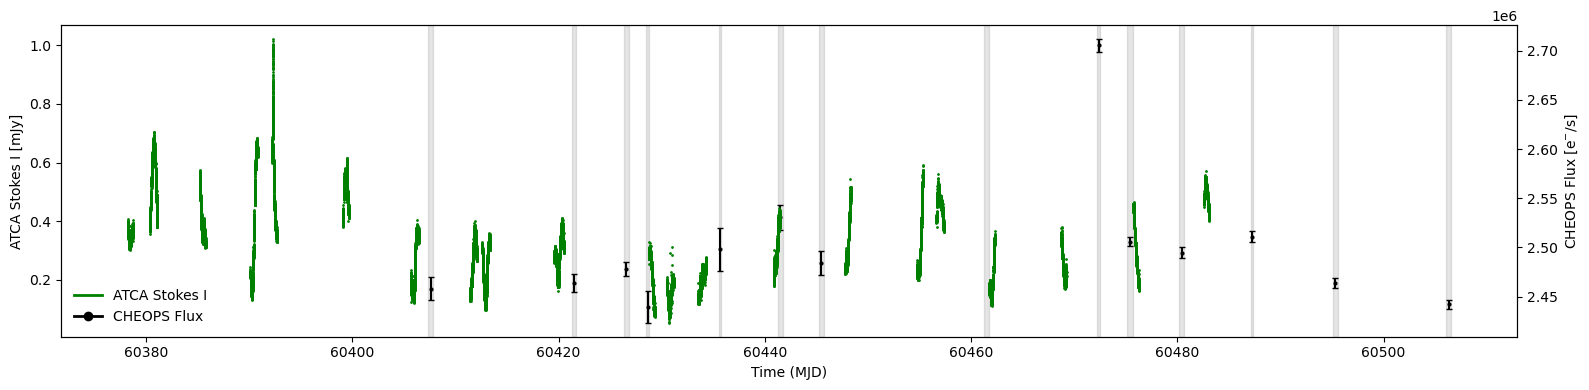

In [26]:
# plot the ranges of the ATCA observations with start_MJD and end_MJD
fig, ax1 = plt.subplots(figsize=(16,4))
for i, row in atca.iterrows():
    # plot a line for each observation
    # plt.plot([row["start_MJD"], row["end_MJD"]], [0, 0], lw=1, color="black",zorder=-10)
    # plot it in axvspan
    ax1.axvspan(row["start_MJD"], row["end_MJD"], color="black", alpha=0.1, zorder=-20)

    # plot stokes I
    ax1.errorbar((row["end_MJD"] + row["start_MJD"])/2, row["StokesI_mJy_b"]*1e3, 
                 yerr = row["sig_StokesI_mJy_b"]*1e3, color="black", zorder=-5, fmt="o", ms=2, capsize=2)

ax2 = ax1.twinx()

ax2.scatter(time, flux, color="green", s=1)

# make left y-axis scale in ppm and right y-axis in mJy
ax2.set_ylabel(r"CHEOPS Flux [e$^{-}$/s]")
ax1.set_xlabel("Time (MJD)")
ax1.set_ylabel("ATCA Stokes I [mJy]")

# make a legend for both axes, using artists 
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color="green", lw=2),
                Line2D([0], [0], color="black", marker="o", lw=2),
                ]
ax1.legend(custom_lines, ['ATCA Stokes I', 'CHEOPS Flux'], loc="lower left",
           frameon = False)



# plt.xlim(60440, 60480)
plt.tight_layout()
plt.savefig("../plots/atca_cheops.png", dpi=300)

# plt.xlim(60460, 60465)
# plt.xlim(60425, 60430)

In [24]:
atca

Run date                        11/05/2024
weekday                                Sat
start time [CEST]      2024-05-11 08:30:00
end time [CEST]        2024-05-11 20:30:00
duration [hh:mm]                  12:00:00
observer                         Ekaterina
array configuration                     6A
setup help?                            NaN
Unnamed: 8                             NaN
total_hours                           12.0
detection? yn                            y
StokesI_mJy_b                     0.000413
sig_StokesI_mJy_b                 0.000044
detection? yn.1                          n
StokesV_mJy_b                          0.0
sig_StokesV_mJy_b                 0.000012
V_I                                    0.0
Unnamed: 17                          !CA03
start_UTC              2024-05-11 06:30:00
end_UTC                2024-05-11 18:30:00
start_deltad                     35.236111
end_deltad                       35.736111
start_MJD                     60441.270833
end_MJD    